Using the data from Question 5, write code the analyze the data and answer the following questions Note -

Draw plots to demonstrate the analysis for the following questions and better visualizations

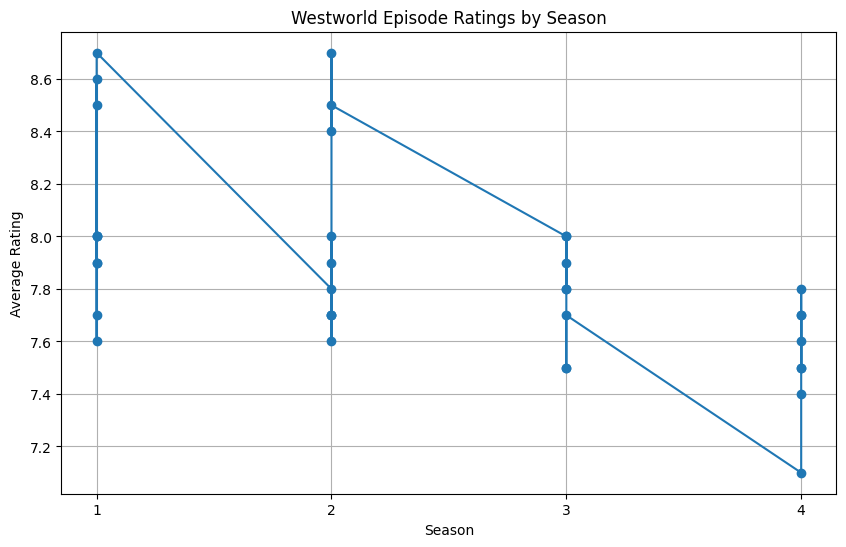

In [12]:
import requests
import matplotlib.pyplot as plt

# Fetching data from the API
response = requests.get('http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')
data = response.json()

episodes = data['_embedded']['episodes']

seasons = []
ratings = []

for episode in episodes:
    seasons.append(episode['season'])
    ratings.append(episode['rating']['average'])

plt.figure(figsize=(10, 6))
plt.plot(seasons, ratings, marker='o')
plt.title('Westworld Episode Ratings by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(range(1, max(seasons) + 1))  # Set x-axis tick labels to the seasons
plt.grid(True)
plt.show()

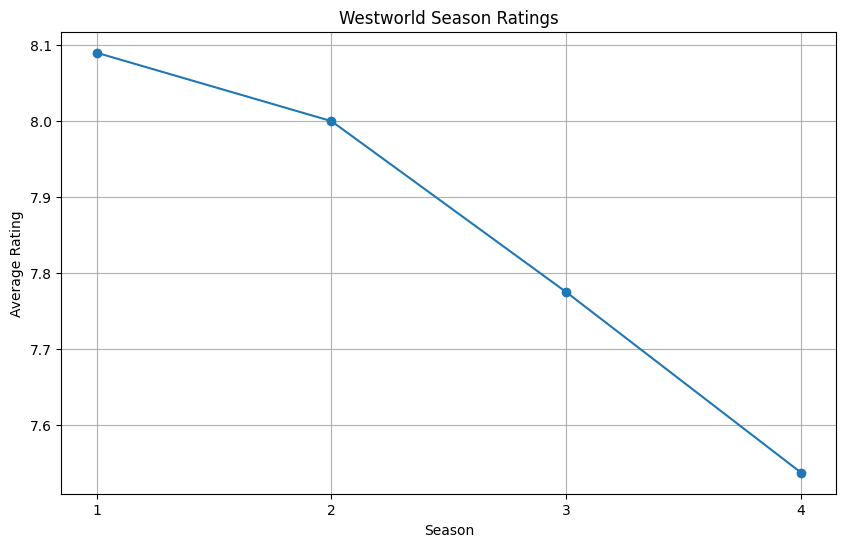

In [13]:
import requests
import matplotlib.pyplot as plt

response = requests.get('http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')
data = response.json()

episodes = data['_embedded']['episodes']

season_ratings = {}

for episode in episodes:
    season = episode['season']
    rating = episode['rating']['average']
    
    if season in season_ratings:
        season_ratings[season].append(rating)
    else:
        season_ratings[season] = [rating]

seasons = []
avg_ratings = []

for season, ratings in season_ratings.items():
    seasons.append(season)
    avg_rating = sum(ratings) / len(ratings)
    avg_ratings.append(avg_rating)

plt.figure(figsize=(10, 6))
plt.plot(seasons, avg_ratings, marker='o')
plt.title('Westworld Season Ratings')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(seasons)
plt.grid(True)
plt.show()

In [14]:
import requests

# Fetch data from the API
response = requests.get('http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')
data = response.json()

# Extract the episode information
episodes = data['_embedded']['episodes']

# Create a dictionary to store episode names by season
season_episodes = {}

# Iterate over episodes and group them by season
for episode in episodes:
    season = episode['season']
    rating = episode['rating']['average']
    episode_name = episode['name']
    
    # Check if the season is already in the dictionary
    if season in season_episodes:
        season_episodes[season].append((episode_name, rating))
    else:
        season_episodes[season] = [(episode_name, rating)]

# Get the episode names with an average rating more than 8 for each season
high_rated_episodes = {}
for season, episodes in season_episodes.items():
    high_rated_episodes[season] = [episode[0] for episode in episodes if episode[1] > 8]

# Print the episode names with high ratings for each season
for season, episodes in high_rated_episodes.items():
    print(f"Season {season} episodes with average rating > 8:")
    for episode in episodes:
        print("-", episode)
    print()


Season 1 episodes with average rating > 8:
- Trompe L'Oeil
- The Well-Tempered Clavier
- The Bicameral Mind

Season 2 episodes with average rating > 8:
- Kiksuya
- Vanishing Point
- The Passenger

Season 3 episodes with average rating > 8:

Season 4 episodes with average rating > 8:



In [15]:
import requests

# Fetch data from the API
response = requests.get('http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')
data = response.json()

# Extract the episode information
episodes = data['_embedded']['episodes']

# Filter episodes aired before May 2019
before_2019_episodes = [episode['name'] for episode in episodes if episode['airdate'] < '2019-05']

# Print the episode names that aired before May 2019
print("Episode names that aired before May 2019:")
for episode in before_2019_episodes:
    print("-", episode)


Episode names that aired before May 2019:
- The Original
- Chestnut
- The Stray
- Dissonance Theory
- Contrapasso
- The Adversary
- Trompe L'Oeil
- Trace Decay
- The Well-Tempered Clavier
- The Bicameral Mind
- Journey Into Night
- Reunion
- Virtù e Fortuna
- The Riddle of the Sphinx
- Akane No Mai
- Phase Space
- Les Écorchés
- Kiksuya
- Vanishing Point
- The Passenger


In [16]:
import requests

# Fetch data from the API
response = requests.get('http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')
data = response.json()

# Extract the episode information
episodes = data['_embedded']['episodes']

# Initialize dictionaries to store the highest and lowest ratings for each season
seasons = {}
highest_ratings = {}
lowest_ratings = {}

# Iterate over the episodes to find the highest and lowest ratings for each season
for episode in episodes:
    season_number = episode['season']
    episode_name = episode['name']
    episode_rating = episode['rating']['average']

    if season_number not in seasons:
        seasons[season_number] = []

    seasons[season_number].append(episode_rating)

    if season_number not in highest_ratings:
        highest_ratings[season_number] = {'episode': episode_name, 'rating': episode_rating}
    else:
        if episode_rating > highest_ratings[season_number]['rating']:
            highest_ratings[season_number] = {'episode': episode_name, 'rating': episode_rating}

    if season_number not in lowest_ratings:
        lowest_ratings[season_number] = {'episode': episode_name, 'rating': episode_rating}
    else:
        if episode_rating < lowest_ratings[season_number]['rating']:
            lowest_ratings[season_number] = {'episode': episode_name, 'rating': episode_rating}

# Print the episode name from each season with the highest and lowest rating
for season_number in seasons:
    print(f"Season {season_number}:")
    print("Highest Rating - Episode:", highest_ratings[season_number]['episode'], "Rating:",
          highest_ratings[season_number]['rating'])
    print("Lowest Rating - Episode:", lowest_ratings[season_number]['episode'], "Rating:",
          lowest_ratings[season_number]['rating'])
    print()


Season 1:
Highest Rating - Episode: The Bicameral Mind Rating: 8.7
Lowest Rating - Episode: The Stray Rating: 7.6

Season 2:
Highest Rating - Episode: Kiksuya Rating: 8.7
Lowest Rating - Episode: Akane No Mai Rating: 7.6

Season 3:
Highest Rating - Episode: Parce Domine Rating: 8
Lowest Rating - Episode: Decoherence Rating: 7.5

Season 4:
Highest Rating - Episode: Zhuangzi Rating: 7.8
Lowest Rating - Episode: The Auguries Rating: 7.1



In [17]:
import requests

# Fetch data from the API
response = requests.get('http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')
data = response.json()

# Extract the episode information
episodes = data['_embedded']['episodes']

# Initialize a dictionary to store the most popular episodes for each season
most_popular_episodes = {}

# Iterate over the episodes to find the most popular episode in each season
for episode in episodes:
    season_number = episode['season']
    episode_name = episode['name']
    episode_rating = episode['rating']['average']
    episode_summary = episode['summary']

    if season_number not in most_popular_episodes:
        most_popular_episodes[season_number] = {'episode': episode_name, 'rating': episode_rating, 'summary': episode_summary}
    else:
        if episode_rating > most_popular_episodes[season_number]['rating']:
            most_popular_episodes[season_number] = {'episode': episode_name, 'rating': episode_rating, 'summary': episode_summary}

# Print the summary for the most popular episode in each season
for season_number in most_popular_episodes:
    print(f"Season {season_number}:")
    print("Most Popular Episode - Episode:", most_popular_episodes[season_number]['episode'])
    print("Rating:", most_popular_episodes[season_number]['rating'])
    print("Summary:", most_popular_episodes[season_number]['summary'])
    print()

Season 1:
Most Popular Episode - Episode: The Bicameral Mind
Rating: 8.7
Summary: <p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>

Season 2:
Most Popular Episode - Episode: Kiksuya
Rating: 8.7
Summary: <p>Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.</p>

Season 3:
Most Popular Episode - Episode: Parce Domine
Rating: 8
Summary: <p>If you're stuck in a loop, try walking in a straight line.</p>

Season 4:
Most Popular Episode - Episode: Zhuangzi
Rating: 7.8
Summary: <p>God is bored.</p>

